In [1]:
%matplotlib inline

import pandas as pd
df = pd.read_csv('eeghdf_summary.csv', dtype={'technician':str, 'patient_additional':str})
df.head()

,file_name,patient_name,patientcode,gender,birthdate,patient_age_days,born_premature,gestatational_age_at_birth_days,bits_per_sample,start_isodatetime,end_isodatetime,number_channels,number_samples_per_channel,sample_frequency,number_channels.1,technician,patient_additional
0,./lpch/longterm/CA0010ED_1-4+.eeghdf,"1260, Subject",2ee5afb61608548aaf92673d2ce8ea9b,Male,1990-01-01,27.187558,unknown,-1.0,16,1990-01-28 04:30:05,1990-01-28 05:09:58.600000,42,478720,200.0,42,NaN,NaN
1,./lpch/longterm/CA8310Y9_1-8+.eeghdf,"1241, Subject",1815bcdb98275b62b6df98f5794c3156,Female,1990-01-01,5550.430660,unknown,-1.0,16,2005-03-13 10:20:09,2005-03-13 10:20:25,42,3200,200.0,42,NaN,NaN
2,./lpch/longterm/CA83110B_1-3+.eeghdf,"1215, Subject",a7e628c2c1085c1f85680c175b20d3f4,Male,1990-01-01,4897.914977,unknown,-1.0,16,2003-05-30 21:57:34,2003-05-30 21:58:14.100000,42,8020,200.0,42,NaN,NaN
3,./lpch/longterm/CA8312DO_1-9+.eeghdf,"1258, Subject",7cfe9ced26e35b85bfc2e340efc23f0a,Female,1990-01-01,482.541562,unknown,-1.0,16,1991-04-28 12:59:51,1991-04-28 13:00:17,42,5200,200.0,42,NaN,NaN
4,./lpch/longterm/CA83132S_1-2+.eeghdf,"1446, Subject",06548eef257453abb801755e54a18b75,Female,1990-01-01,764.598542,unknown,-1.0,16,1992-02-04 14:21:54,1992-02-04 14:36:43,136,444500,500.0,136,NaN,NaN


In [2]:
df.count()

file_name                          136362
patient_name                       136362
patientcode                        136362
gender                             134705
birthdate                          136362
patient_age_days                   136362
born_premature                     136362
gestatational_age_at_birth_days    136362
bits_per_sample                    136362
start_isodatetime                  136362
end_isodatetime                    136362
number_channels                    136362
number_samples_per_channel         136362
sample_frequency                   136362
number_channels.1                  136362
technician                              0
patient_additional                      1
dtype: int64

Now look at the population aspects of the de-identified data

In [3]:
subj = df.drop_duplicates(subset=['patient_name']) # get rows by unique patient
# note this will keep the first instance

In [4]:
subj.count()

file_name                          12385
patient_name                       12385
patientcode                        12385
gender                             12163
birthdate                          12385
patient_age_days                   12385
born_premature                     12385
gestatational_age_at_birth_days    12385
bits_per_sample                    12385
start_isodatetime                  12385
end_isodatetime                    12385
number_channels                    12385
number_samples_per_channel         12385
sample_frequency                   12385
number_channels.1                  12385
technician                             0
patient_additional                     0
dtype: int64

In [5]:
TOTAL_SUBJECTS = subj['patientcode'].count()
TOTAL_SUBJECTS

12385

In [6]:
cols = ['patient_name', 'gender', 'patient_age_days', 'patientcode']
subj = subj[cols]

In [7]:
subj

,patient_name,gender,patient_age_days,patientcode
0,"1260, Subject",Male,27.187558,2ee5afb61608548aaf92673d2ce8ea9b
1,"1241, Subject",Female,5550.430660,1815bcdb98275b62b6df98f5794c3156
2,"1215, Subject",Male,4897.914977,a7e628c2c1085c1f85680c175b20d3f4
3,"1258, Subject",Female,482.541562,7cfe9ced26e35b85bfc2e340efc23f0a
4,"1446, Subject",Female,764.598542,06548eef257453abb801755e54a18b75
5,"1286, Subject",Female,25.985498,bcc241714d2453c69c60b0fd9147df0b
6,"1368, Subject",Male,5490.800567,b50327da15245e03b6d0a916569c9696
7,"1497, Subject",Male,446.106111,2f008b3bbddf5d15b7b81bb3a3fca11a
8,"152, Subject",Male,229.544132,9c122c43f751588c84653e4164c78251
9,"1556, Subject",Female,6237.822986,df5fdd027da153a0b77ff7bfae67a963


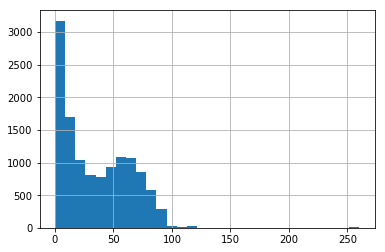

In [8]:
subj['patient_age_years'] = subj.patient_age_days/365.25
subj.patient_age_years.hist(bins=30);

In [9]:
males = subj[subj['gender'] == 'Male']
females = subj[subj['gender'] == 'Female']
num_males = males['patientcode'].count()
num_females = females['patientcode'].count()
print("number of males: %s" % num_males)
print("number of females: %s" % num_females)

number of males: 6193
number of females: 5970


In [10]:
age_18 = 18 * 365.25 # number of days in 18 years

## traditional definitions of age categories

neonates = subj[subj.patient_age_days <= 30]
children = subj[subj.patient_age_days < age_18]
adults = subj[subj.patient_age_days >= age_18]

In [11]:
neonates.count()

patient_name         375
gender               371
patient_age_days     375
patientcode          375
patient_age_years    375
dtype: int64

In [12]:
children.count()

patient_name         4994
gender               4920
patient_age_days     4994
patientcode          4994
patient_age_years    4994
dtype: int64

In [13]:
adults.count()

patient_name         7391
gender               7243
patient_age_days     7391
patientcode          7391
patient_age_years    7391
dtype: int64